In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
a = np.random.rand(2,3, 6)
b = a.ravel()
print(a)
print(b)

[[[0.45498005 0.62916063 0.46444588 0.30377813 0.11257736 0.49292007]
  [0.48369535 0.12612036 0.17522751 0.36369038 0.91296599 0.57061669]
  [0.66786935 0.87202758 0.82815079 0.07215745 0.02224401 0.24867518]]

 [[0.4534592  0.15186914 0.53737156 0.05306872 0.53980843 0.9400257 ]
  [0.02596845 0.60195082 0.57622099 0.10157138 0.32932261 0.08536037]
  [0.51678778 0.43185078 0.76990622 0.90805667 0.74635694 0.64268135]]]
[0.45498005 0.62916063 0.46444588 0.30377813 0.11257736 0.49292007
 0.48369535 0.12612036 0.17522751 0.36369038 0.91296599 0.57061669
 0.66786935 0.87202758 0.82815079 0.07215745 0.02224401 0.24867518
 0.4534592  0.15186914 0.53737156 0.05306872 0.53980843 0.9400257
 0.02596845 0.60195082 0.57622099 0.10157138 0.32932261 0.08536037
 0.51678778 0.43185078 0.76990622 0.90805667 0.74635694 0.64268135]


In [36]:


D = np.random.randn(1000, 500)
n_hidden = [500] * 10
nonlinearity = ['relu'] * len(n_hidden)

act = {'tanh': lambda x: np.tanh(x), 'relu': lambda x: np.maximum(0, x)}
Hs = {}

for i in range(len(n_hidden)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = n_hidden[i]
    W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in/2)
    H = np.dot(X, W)
    H = act[nonlinearity[i]](H)
    Hs[i] = H

input layer has mean: -0.002, std: 1.002
hidden layer 1 has mean: 0.563, std: 0.825
hidden layer 2 has mean: 0.569, std: 0.826
hidden layer 3 has mean: 0.571, std: 0.828
hidden layer 4 has mean: 0.605, std: 0.870
hidden layer 5 has mean: 0.641, std: 0.890
hidden layer 6 has mean: 0.622, std: 0.913
hidden layer 7 has mean: 0.640, std: 0.925
hidden layer 8 has mean: 0.592, std: 0.909
hidden layer 9 has mean: 0.551, std: 0.889
hidden layer 10 has mean: 0.566, std: 0.800


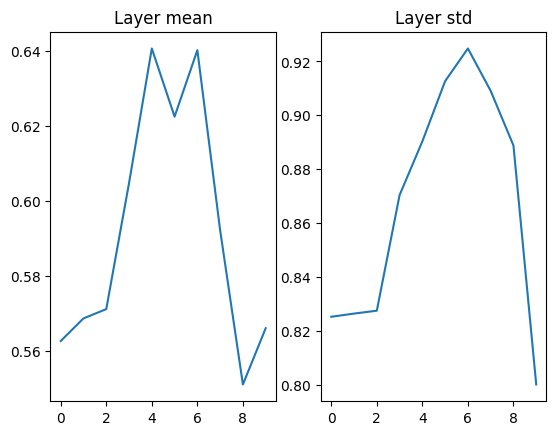

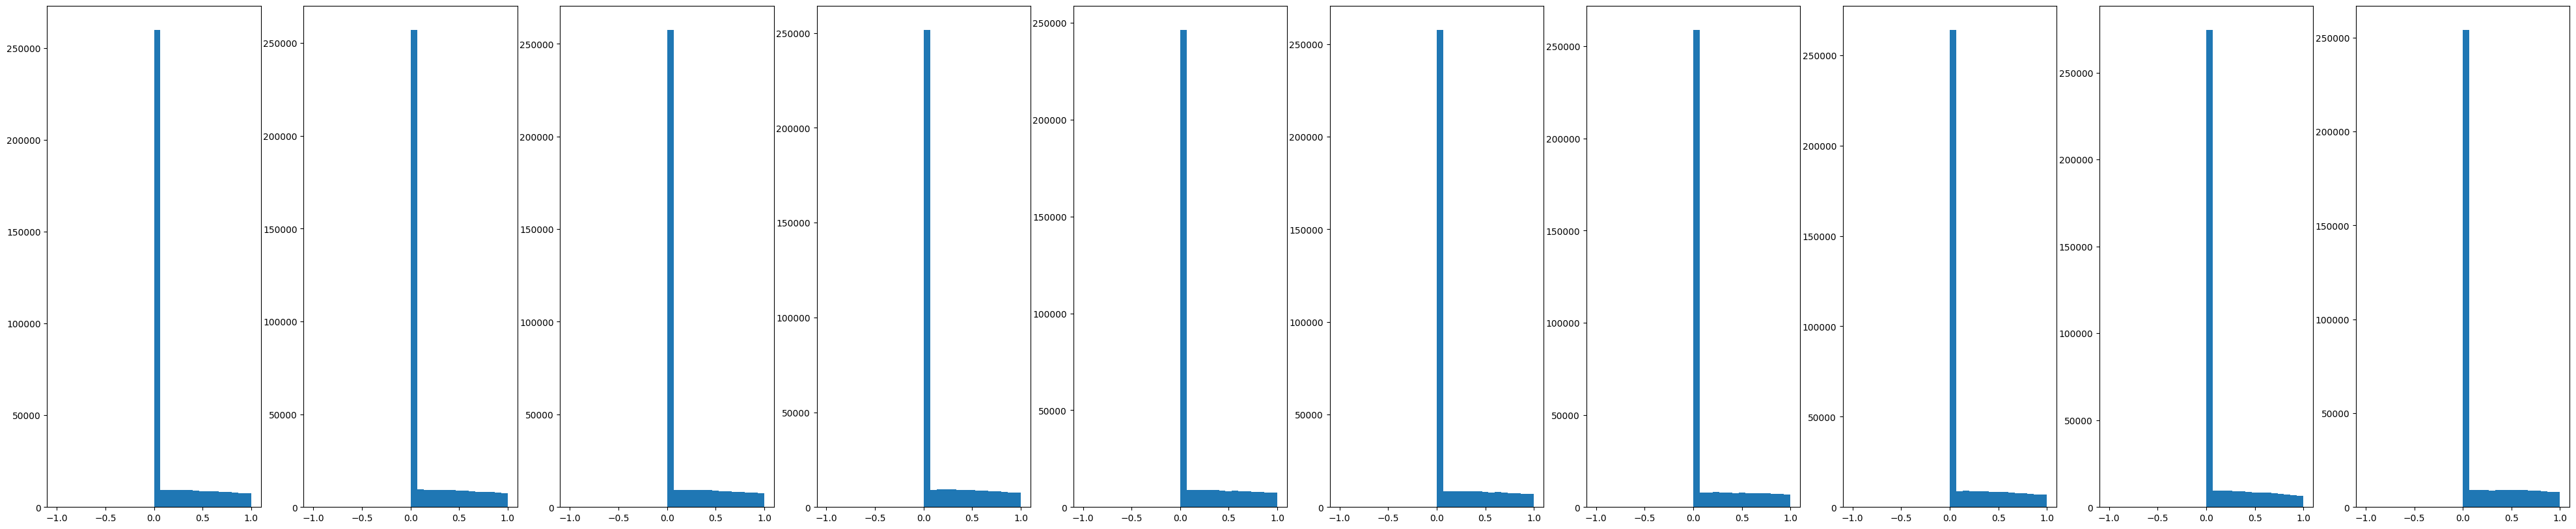

In [37]:
print(f"input layer has mean: {D.mean().item():.3f}, std: {D.std().item():.3f}")

layer_mean = [np.mean(H) for H in Hs.values()]
layer_std = [np.std(H) for H in Hs.values()]

for i, H in enumerate(Hs):
    print(f"hidden layer {i + 1} has mean: {layer_mean[i]:.3f}, std: {layer_std[i]:.3f}")

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_mean, label='mean')
plt.title('Layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_std, label='std')
plt.title('Layer std')

plt.figure(figsize=(50, 10))
for i, H in Hs.items():
    plt.subplot(1, len(Hs), i + 1)
    plt.hist(H.ravel(), 30, range=(-1, 1))